# 911 Calls Dataset Analysis - Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). 

## Data and Setup

Imports that we will need accomplishing our project.

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline

At first we need to read our dataset.

In [2]:
df = pd.read_csv('911.csv')

Take a look at basic informations about our dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Check first 5 records of dataframe.

In [43]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday


## Basic Questions

What are the top 5 zipcodes for 911 calls?

In [6]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

What are the top 5 townships (twp) for 911 calls?

In [7]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

How many unique call titles do we have?

In [8]:
df['title'].nunique()

110

## Data preprocessing

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.

In [52]:
df['title'].sample(5)

53369    Traffic: DISABLED VEHICLE -
50684         Fire: WOODS/FIELD FIRE
28725    Traffic: DISABLED VEHICLE -
59619    Traffic: VEHICLE ACCIDENT -
374                 EMS: FALL VICTIM
Name: title, dtype: object

We should extract this information to separated column named 'Reason'.

In [10]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

Take a look which reasons are most popular in dataset.

In [12]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Create a simple plot based on those informations.

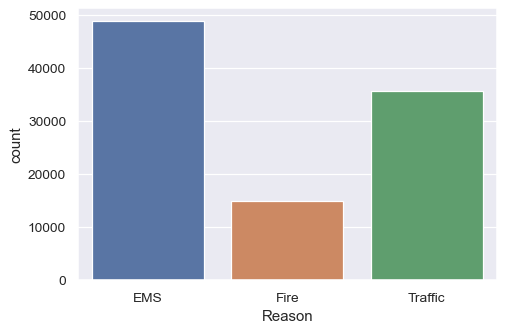

In [85]:
plt.figure(dpi = 90)
sns.countplot(x = 'Reason', data = df)
plt.show()

Let's check the type of objects in 'timeStamp' column.

In [17]:
type(df['timeStamp'].iloc[0])

str

We can convert 'timeStamp' column into DataType object.

In [18]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

Now, we can easily extract needed informations.

In [19]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.day_name())

Let's check how our new columns look like.

In [23]:
df[['Hour','Month','Day of Week']].sample(5)

,Hour,Month,Day of Week
42736,10,3,Tuesday
68399,20,6,Sunday
19081,16,1,Tuesday
35526,20,3,Tuesday
70669,7,6,Saturday


## Plotting 

Let's create a plot that shows most common call reasons based on the day of week.

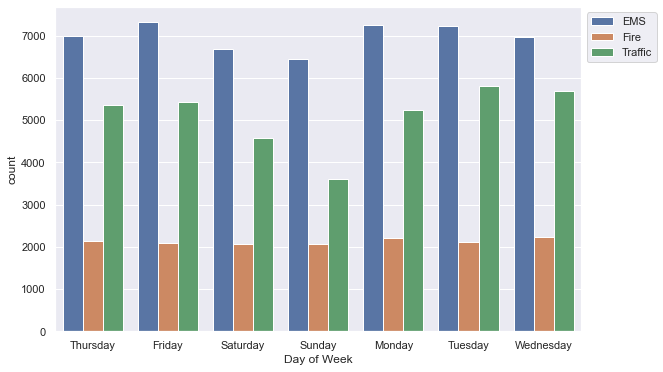

In [86]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'Day of Week', hue = 'Reason', data = df)
plt.tight_layout(pad = 0.1)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

Let's create same plot but for months.

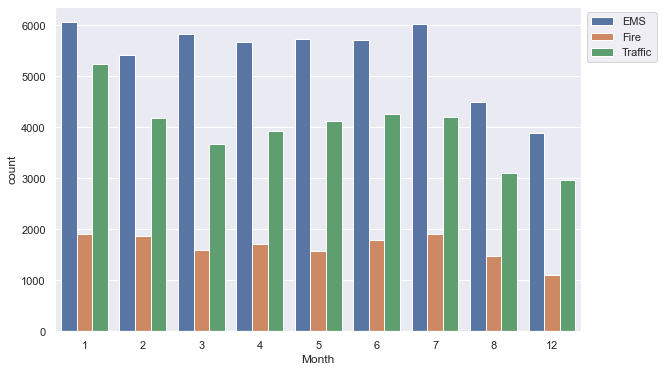

In [88]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'Month', hue = 'Reason', data = df)
plt.tight_layout(pad = 0.1)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

We can notice that, we lack informations about 3 of the months in out dataset.
<br>
Let's try to plot out data in another way, to maybe fill those informations.
<br>
We can use basic line plot here, but first we need to process our data a little.

In [191]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Date
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


Now we can create a simple line plot, as we can see, we filled lacking informations about months.

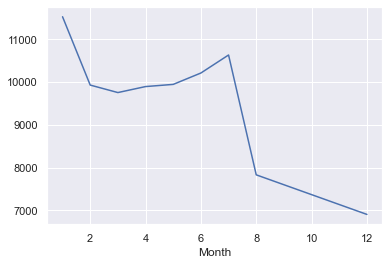

In [99]:
byMonth.plot.line(y = 'zip')
plt.legend().remove()
plt.show()

We can use lmplot to create a linear fit, that shows correlation between number of calls and months.

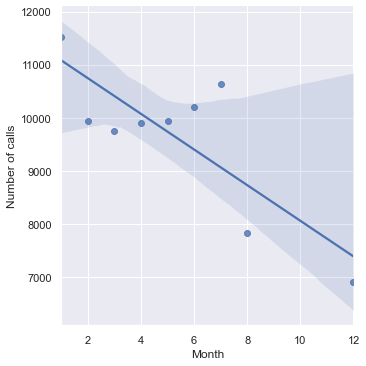

In [105]:
sns.lmplot(x = 'Month', y = 'zip', data = byMonth.reset_index())
plt.ylabel('Number of calls')
plt.show()

Let's create a new column called 'Date' that contains the date from the timeStamp column.

In [107]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())

In [113]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


Now we can create a plot that shows counts of 911 calls in specific date.

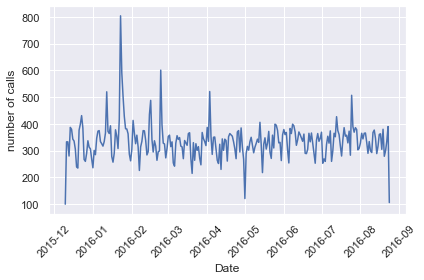

In [133]:
df.groupby('Date').count()['zip'].plot.line(rot = 45,ylabel = 'number of calls')
plt.tight_layout()

Now recreate this plot but create 3 separate plots with each plot representing a reason for the 911 call.

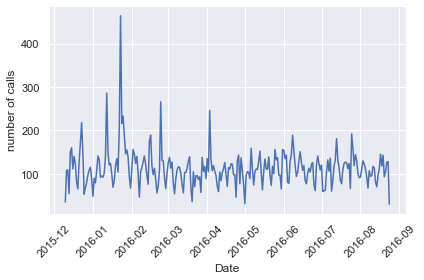

In [134]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['zip'].plot.line(rot = 45,ylabel = 'number of calls')
plt.tight_layout()

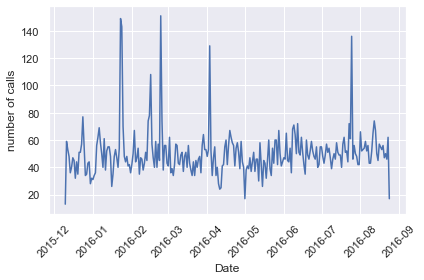

In [136]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['zip'].plot.line(rot = 45,ylabel = 'number of calls')
plt.tight_layout()

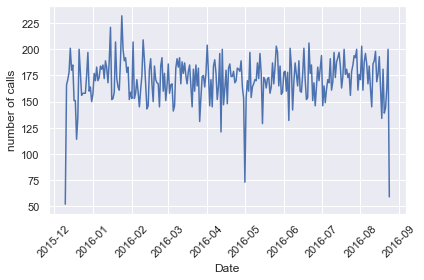

In [190]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['zip'].plot.line(rot = 45,ylabel = 'number of calls')
plt.tight_layout()

Now, let's try to create a HeatMap using seaborn, at first we need to prepare our data.

In [150]:
df_heat = df.groupby(['Day of Week','Hour']).count().unstack()['zip']
df_heat.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,248,200,165,164,184,166,319,526,637,663,...,808,840,897,826,714,616,569,491,445,400
Monday,243,198,183,173,185,222,338,547,723,690,...,761,776,837,845,762,654,547,444,410,294
Saturday,324,265,226,212,202,205,227,353,416,566,...,677,677,706,649,678,613,550,508,451,402
Sunday,336,280,246,228,199,214,251,343,434,554,...,608,588,555,608,574,559,465,419,365,283
Thursday,251,180,200,144,162,167,293,495,686,733,...,758,828,790,868,707,610,543,472,356,307


## HeatMaps and ClusterMaps

Now create a HeatMap using this new DataFrame.

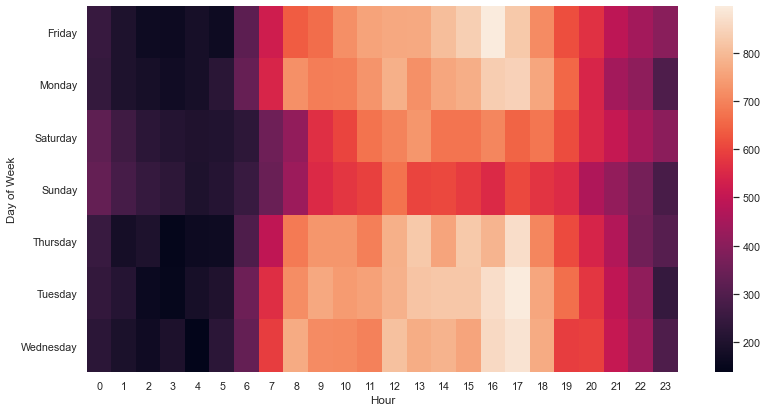

In [184]:
plt.figure(figsize = (12,6),dpi = 70)
heat_map = sns.heatmap(df_heat)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
plt.tight_layout()

Now create a ClusterMap using this DataFrame.

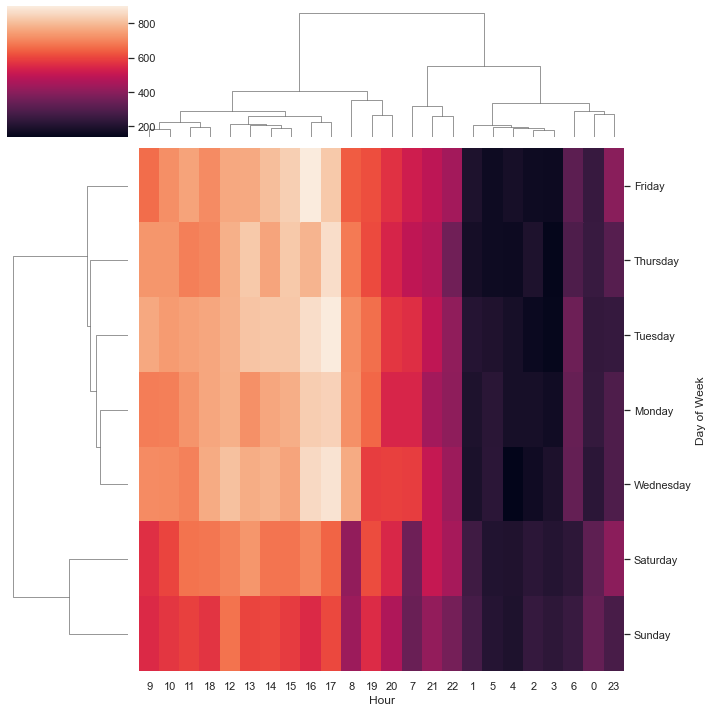

In [183]:
sns.clustermap(df_heat)
plt.tight_layout()

Repeat those operations for a DataFrame that shows the Month as the column.

In [186]:
df_heat = df.groupby(['Day of Week','Month']).count().unstack()['zip']
df_heat.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Friday,1736,1362,1332,1684,1504,1429,1811,1123,906
Monday,1506,1658,1364,1401,1547,1397,1473,1316,1101
Saturday,1987,1240,1110,1512,1265,1203,1507,956,832
Sunday,1729,1059,974,1304,1233,1136,1440,878,805
Thursday,1387,1392,1648,1391,1387,1800,1447,1038,1090


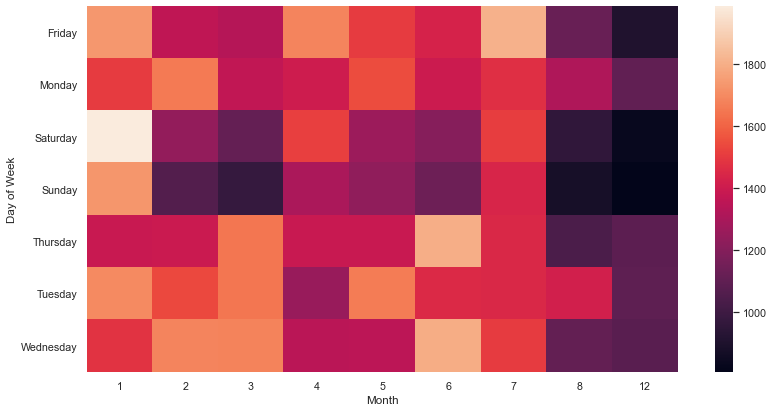

In [187]:
plt.figure(figsize = (12,6),dpi = 70)
heat_map = sns.heatmap(df_heat)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
plt.tight_layout()

Now create a ClusterMap using this DataFrame.

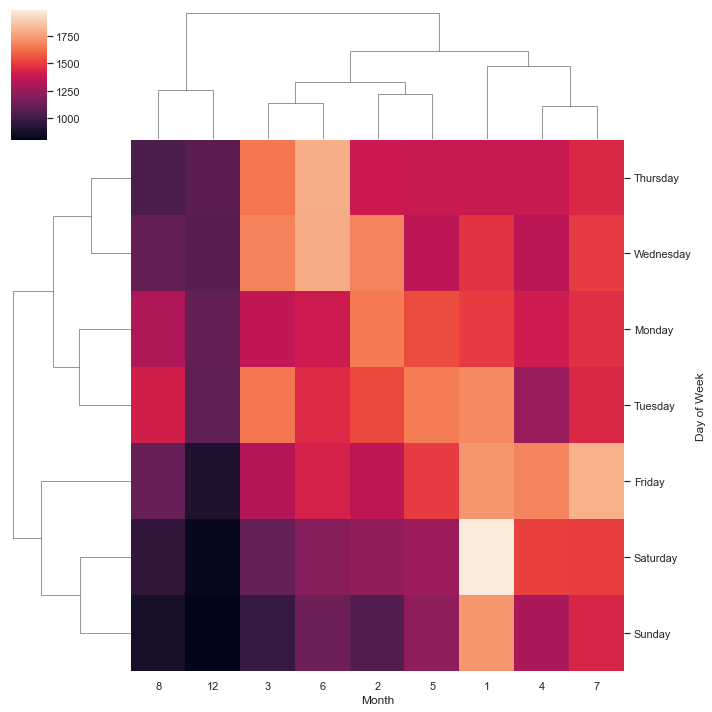

In [189]:
sns.clustermap(df_heat)
plt.show()